<a href="https://colab.research.google.com/github/ivocardozo/AddUser/blob/practice1/MDSv3_ML_P1_Regresion_Avanzada_rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# Introduccion

### Integrates de Grupo:
* INTEGRANTE_1 (email_1)
* INTEGRANTE_2 (email_2)
...

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# Configuracion e Instalacion

In [2]:
!pip install statsmodels

In [3]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import sys

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
# DATA_FILE_PATH = '_data/dataset.csv'
DATA_FILE_PATH = '/content/dataset (1).csv'
# DATA_FILE_PATH = '/content/Data_trabajada.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)

# Entendimiento de los Datos

In [5]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
raw_data.set_index =raw_data.Id
raw_data.drop(columns='Id',inplace=True)

In [7]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# 2. Configuracion e Instalacion

# 3. Entendimiento de los Datos

In [26]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

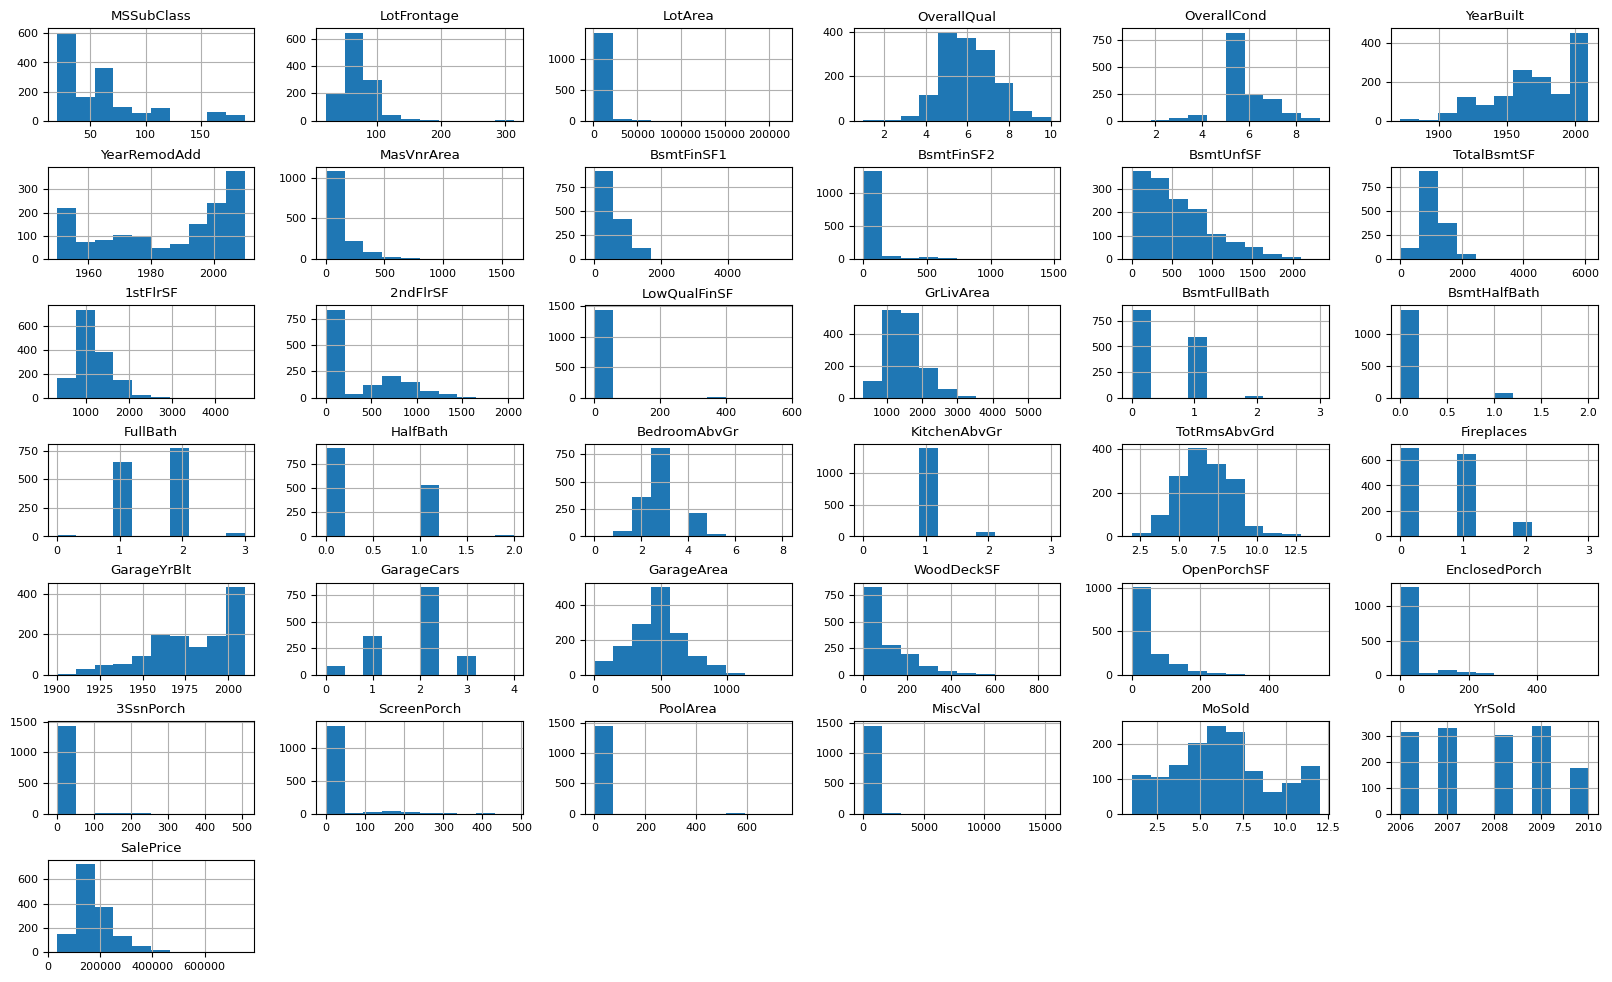

In [20]:
ax = raw_data.hist(figsize=(20, 12))  # Crear histogramas con un tamaño de figura de 20x12 pulgadas

# Ajustar el tamaño de la fuente de las etiquetas y títulos
plt.rcParams.update({'font.size': 8})  # Establecer el tamaño de fuente a 8 puntos
plt.subplots_adjust(hspace=0.5)  # Ajustar la separación vertical entre subgráficas a 0.5 (puede ajustar este valor según lo necesario)

# Mostrar el gráfico
plt.show()


## Distribucion de precios de viviendas

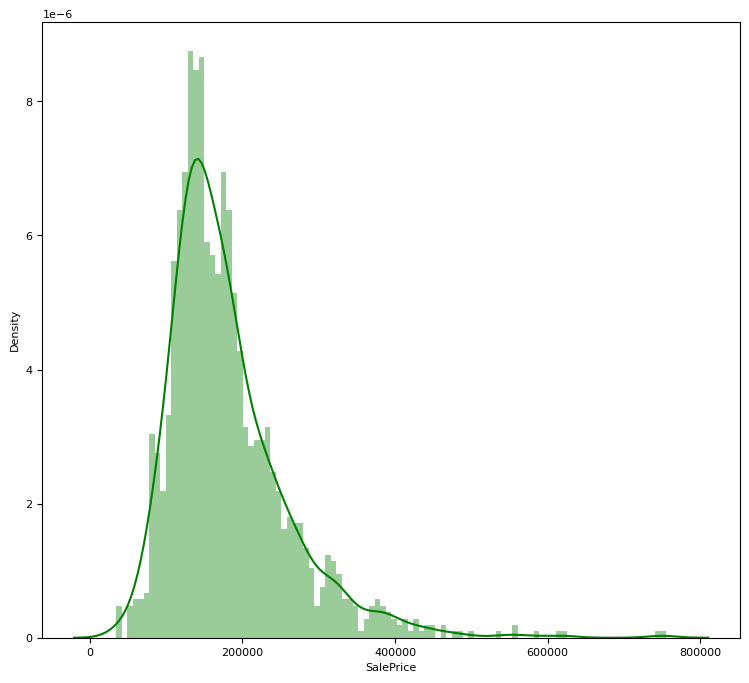

In [21]:
plt.figure(figsize=(9, 8))
sns.distplot(raw_data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

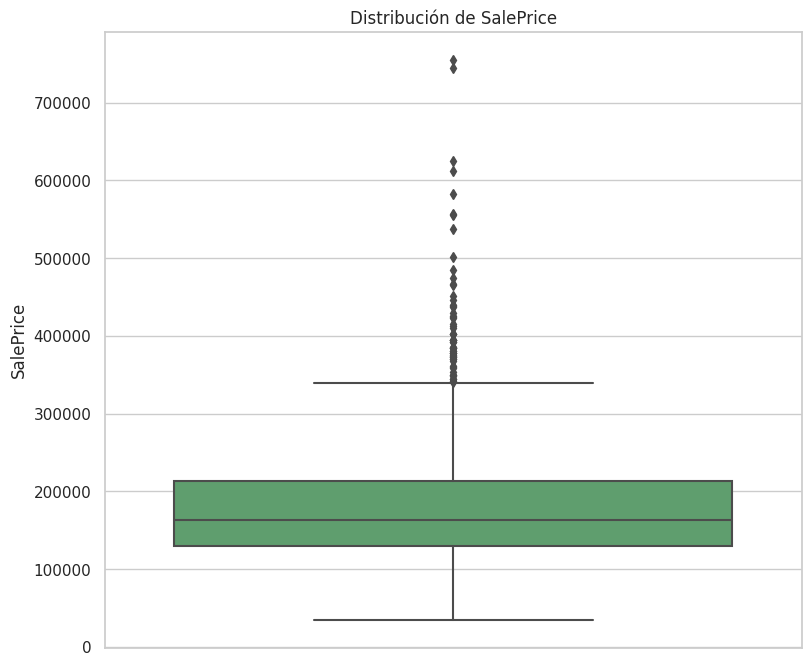

In [31]:
plt.figure(figsize=(9, 8))
sns.boxplot(y=raw_data['SalePrice'], color='g')

# Añadir título y etiquetas
plt.title("Distribución de SalePrice")
plt.ylabel("SalePrice")

# Mostrar el gráfico
plt.show()


# 4. Manipulacion y Limpieza de Datos

# 4.1. Dropping Data

## 4.1.1 Eliminar filas duplicadas

In [ ]:
# verificamos y eliminar si existe filas duplicadas
def f_eliminaRowDuplicado(ds):
  cant = sum(ds.duplicated(keep = False))
  print(f"Cant. Valors duplicados : {cant}" )
  if cant ==0:
    print("no se elimino ningun registro")
  else :
    print("Se elimino filas duplicadas")
    ds.drop_duplicates(subset = None, inplace =True)
  return(ds)

In [ ]:
raw_data_sd= f_eliminaRowDuplicado(raw_data)

Cant. Valors duplicados : 0
no se elimino ningun registro


In [ ]:
# creamos la funcion para elimnar columnas duplicadas
def f_eliminarColumnDuplicados(ds):
  duplicadoColumn =[]
  for i in range(ds.shape[1]):
    column= ds.iloc[:,i]
    for j in range(i+1,ds.shape[1]):
      if column.equals(ds.iloc[:,j]):
        duplicadoColumn.append(ds.columns.values[j])

  print(f"Cantidad de columnas duplicadas son : {len(duplicadoColumn)}")

  if len(duplicadoColumn)==0:
    print("No se elimino niguna columns")
  else :
    print(f"Se elimino las siguientes columnas: {duplicadoColumn}")
    ds.drop(columns=duplicadoColumn , inplace =True)
  return(ds)

In [ ]:
#llamamos la funcion creada para eliminar columnas duplicadas
raw_data_sd = f_eliminarColumnDuplicados(raw_data_sd)

Cantidad de columnas duplicadas son : 0
No se elimino niguna columns


In [ ]:
#Creamos la funcion para identificar el porcentaje de valores faltantes
def f_valoreFaltante(ds):
    can_null =ds.isnull().sum()
    porcentaje = (ds.isnull().sum()/ds.isnull().count()*100)
    tipo = raw_data_sd.dtypes
    ds_Val_Null= pd.concat([can_null,porcentaje,tipo],axis =1 , keys =['Valores_faltantes','Porcentaje','tipo'])

    return(ds_Val_Null.sort_values(by='Porcentaje',ascending = False))

In [ ]:
df_null=pd.DataFrame(f_valoreFaltante(raw_data_sd))
df_null.head(30)

,Valores_faltantes,Porcentaje,tipo
PoolQC,1453,99.52,object
MiscFeature,1406,96.30,object
Alley,1369,93.77,object
Fence,1179,80.75,object
FireplaceQu,690,47.26,object
LotFrontage,259,17.74,float64
GarageYrBlt,81,5.55,float64
GarageCond,81,5.55,object
GarageType,81,5.55,object
GarageFinish,81,5.55,object


In [ ]:
#eliminamos las columnas que tienen mas del 90 % de datos faltantes
v_null_90=df_null.index[df_null['Porcentaje']>=50].to_list()
v_null_90
raw_data_sd.drop(columns=v_null_90,inplace=True)

In [ ]:
# se generara una nueva columna con las columnas que tienen  entre 30% a 50% de datos faltantes,se asiganara un "1"
# a los datos que tengan un valor distinto a null y "0" a los datos faltantes.

v_null_30_50=df_null.index[(df_null['Porcentaje']>=30)& (df_null['Porcentaje']<50)].to_list()
raw_data_sd['FireplaceQu_b']=raw_data_sd['FireplaceQu'].apply(lambda x: 1 if pd.notnull(x) else 0 )
raw_data_sd.drop(columns=v_null_30_50,inplace=True)

In [ ]:
v_null_10_cuali=df_null.index[(df_null['Porcentaje']>0)&(df_null['Porcentaje']<=10)&(df_null['tipo']=='object')].to_list()
v_null_10_cuanti=df_null.index[(df_null['Porcentaje']>0)&(df_null['Porcentaje']<=10)&((df_null['tipo']!='object'))].to_list()
print(v_null_10_cuali)
print(v_null_10_cuanti)

['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrType', 'Electrical']
['GarageYrBlt', 'MasVnrArea']


In [ ]:
# eliminamos las columnas que tienen menos del 10% de datos null,se remplazaran los valores con la mediana en datos cuantitativos y con el
# valores de la moda en valores cualitativos.
v_null_10_cuali=df_null.index[(df_null['Porcentaje']>0)&(df_null['Porcentaje']<=10)&(df_null['tipo']=='object')].to_list()
v_null_10_cuanti=df_null.index[(df_null['Porcentaje']>0)&(df_null['Porcentaje']<=10)&((df_null['tipo']!='object'))].to_list()

for v_cuanti in v_null_10_cuanti:
    media = raw_data_sd[v_cuanti].median()
    raw_data_sd[v_cuanti].fillna(media, inplace=True)

for v_cuali in v_null_10_cuali:
    moda = raw_data_sd[v_cuali].mode().iloc[0]
    raw_data_sd[v_cuali].fillna(moda,inplace=True)



In [ ]:
# a las variables que tienen entre el 10 y el 29 % de datos se realizara una imputacion de datos faltantes a traves de
# un modelo de regresion lineal.
df_sn_int=raw_data_sd.select_dtypes(exclude='object')

train =df_sn_int.dropna()
test =df_sn_int[df_sn_int.isnull().any(axis=1)]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train.drop(columns='LotFrontage'),train.LotFrontage)
pred = lr.predict(test.drop(columns='LotFrontage'))

In [ ]:
raw_data_sd.loc[raw_data_sd['LotFrontage'].isnull(),'LotFrontage']=pred

In [ ]:
#revisamos nuevamente la existencia de datos faltantes.
pd.DataFrame(f_valoreFaltante(raw_data_sd)).head(30)


,Valores_faltantes,Porcentaje,tipo
MSSubClass,0,0.00,int64
HalfBath,0,0.00,int64
GarageType,0,0.00,object
Fireplaces,0,0.00,int64
Functional,0,0.00,object
TotRmsAbvGrd,0,0.00,int64
KitchenQual,0,0.00,object
KitchenAbvGr,0,0.00,int64
BedroomAbvGr,0,0.00,int64
FullBath,0,0.00,int64


# 4.2. Derived Data

In [ ]:
#separamos los datos cuantitativos y cualitativos
df_cuali =raw_data_sd.select_dtypes(include='object')
df_cuanti =raw_data_sd.select_dtypes(exclude='object')

In [ ]:
# Procedemos a trasnformar las variables categoricas , utilizamos one hot encoder
df_cuali_dum=pd.get_dummies(df_cuali,drop_first=True)

In [ ]:
df_cuali_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0

In [ ]:
#cocatenamos el data frame con valores cuantitativos y el nuevo dataframe con los encoders.
df_f =pd.concat([df_cuanti,df_cuali_dum],axis=1)

In [ ]:
df_f.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FireplaceQu_b,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.00,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
#Realizamos la estandarizacion de variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_f),columns=df_f.columns)


In [ ]:
df_scaler.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FireplaceQu_b,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.07,-0.24,-0.21,0.65,-0.52,1.05,0.88,0.51,0.58,-0.29,-0.94,-0.46,-0.79,1.16,-0.12,0.37,1.11,-0.24,0.79,1.23,0.16,-0.21,0.91,-0.95,1.02,0.31,0.35,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,0.14,0.35,-1.06,-0.22,-0.11,0.52,-0.42,0.06,-0.17,-0.08,0.76,-0.19,-0.16,0.34,-0.03,-0.26,-0.18,-0.05,0.62,-0.22

# 5 Analisis de Datos




## A. Analisis-Univariable

### a. Plot Numeric Data

Text(0.5, 1.0, 'Distribución de Precios de Venta')

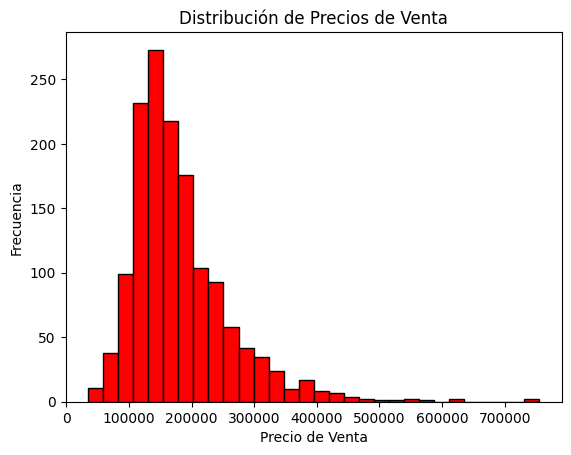

In [ ]:
# Histograma de la distribución de Sale Prices
plt.hist(raw_data['SalePrice'], bins=30, color='red', edgecolor='black')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta')

La grafica muestra que los precios mas altos estan en al region de 100000 - 125000

### b. Plot Categorical Data

Text(0.5, 1.0, 'Precio de Venta Promedio por Tipo de Edificio')

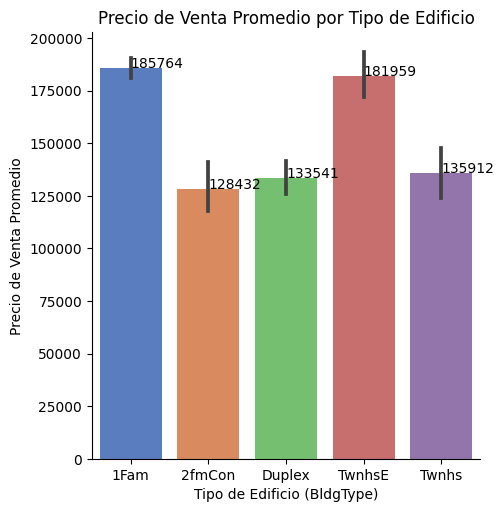

In [ ]:
# Gráfico de barras para el promedio de precios de venta por tipo de edificio
B_S = sns.catplot(x='BldgType', y='SalePrice', data=raw_data, kind='bar', palette='muted')
for ax in B_S.axes.flat:
  for p in ax.patches:
    x_coord = p.get_x() + 0.5 * p.get_width()
    value = p.get_height()
    ax.annotate(f'{value:.0f}', (x_coord, value), ha='left')
plt.xlabel('Tipo de Edificio (BldgType)')
plt.ylabel('Precio de Venta Promedio')
plt.title('Precio de Venta Promedio por Tipo de Edificio')

La grafica muestra que el precio promedio mas alto es para edificioes del tipo 1Fam y TwnshE

Text(0.5, 1.0, 'Distribución por Tipos de Zonificación')

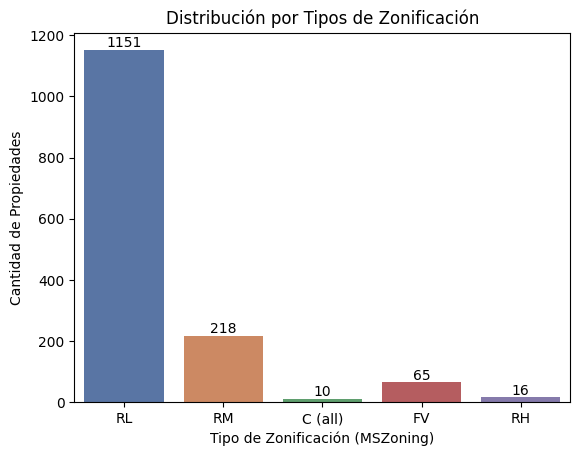

In [ ]:
# Gráfico de conteo de propiedades por tipo de zonificación
M = sns.countplot(x='MSZoning', data=raw_data, palette='deep')
for p in M.patches:
  x_coord = p.get_x() + 0.5 * p.get_width()
  value = p.get_height()
  M.annotate(f'{value:.0f}', (x_coord, value), ha='center', va='bottom')
plt.xlabel('Tipo de Zonificación (MSZoning)')
plt.ylabel('Cantidad de Propiedades')
plt.title('Distribución por Tipos de Zonificación')

En la grafica se puede observar que hay un numero significativamente mayor en edificios con tipos de zonificacion RL.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

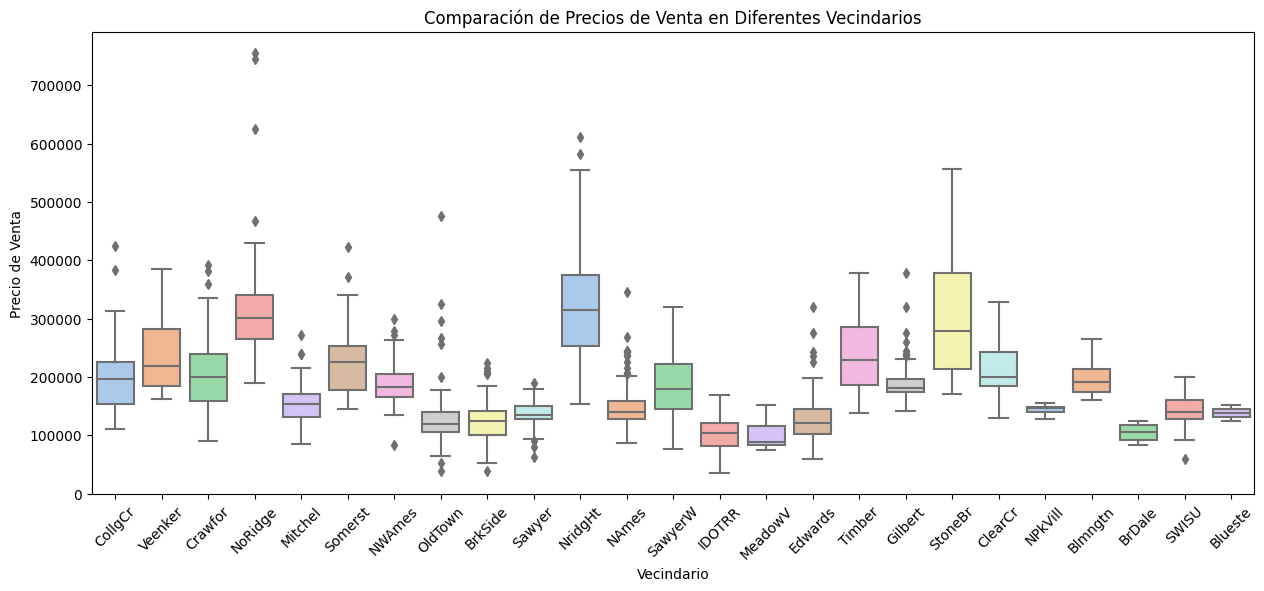

In [ ]:
# Boxplot de precios de venta por vecindario
plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=raw_data, palette='pastel')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta')
plt.title('Comparación de Precios de Venta en Diferentes Vecindarios')
plt.xticks(rotation=45)

El grafico muestra que el rango de precios mas amplio se observa en los vecindarios NridgHt y StoneBr.

## B. Analisis Bivariable

Text(0.5, 1.0, 'Diagrama de Dispersión de GrLivArea vs. Precio de Venta')

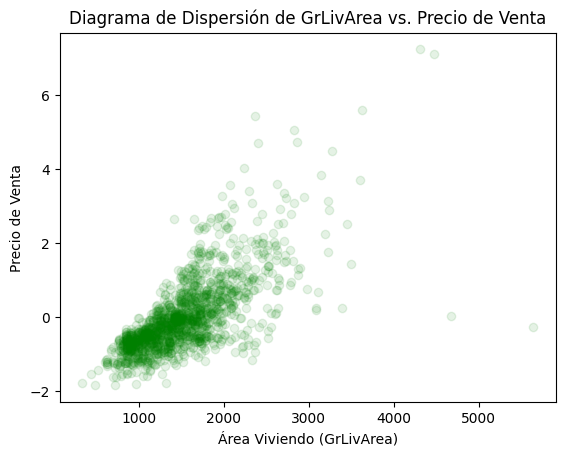

In [ ]:
# Diagrama de dispersión de GrLivArea vs. SalePrice
plt.scatter(raw_data['GrLivArea'], df_scaler['SalePrice'], alpha=0.1, color='green')
plt.xlabel('Área Viviendo (GrLivArea)')
plt.ylabel('Precio de Venta')
plt.title('Diagrama de Dispersión de GrLivArea vs. Precio de Venta')

La grafica muestra que la mayoria de los edificios tienen entre 750 y 2000 pies/

Text(0.5, 1.0, 'Mapa de Calor de Correlaciones')

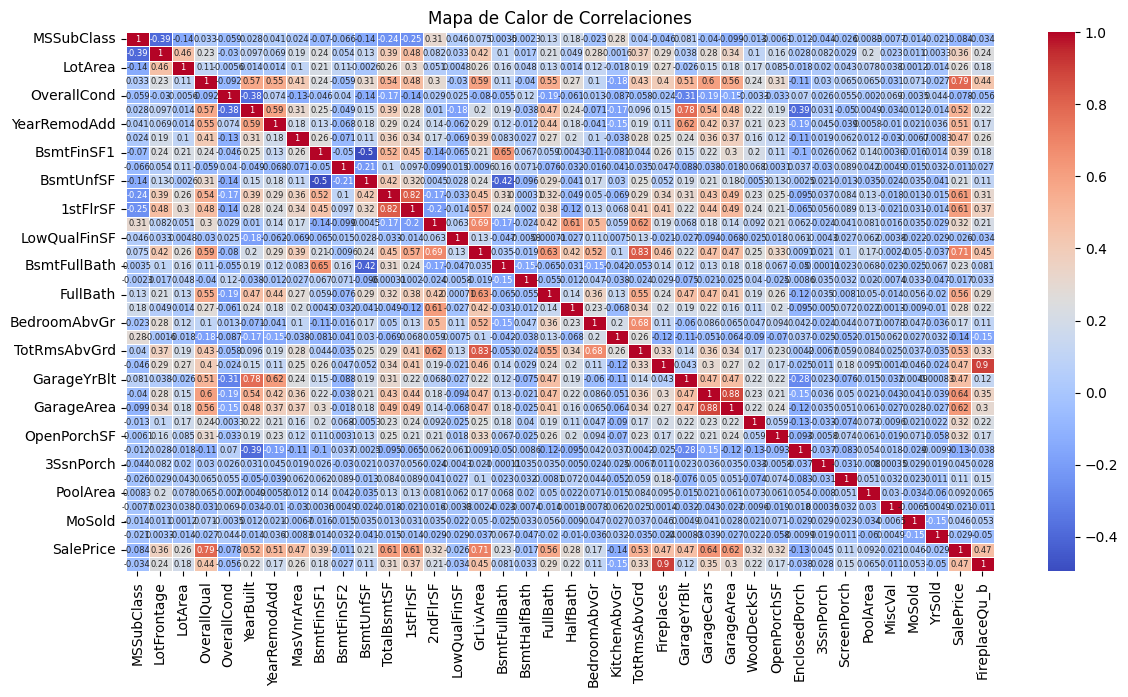

In [ ]:
# Mapa de calor de correlaciones entre variables numéricas
plt.figure(figsize=(14, 7))
sns.heatmap(raw_data.corr(), annot=True, annot_kws={"size": 6}, cmap='coolwarm', linewidth=.5)
plt.title('Mapa de Calor de Correlaciones')

En el mapa de calor, podemos ver que las columnas OverallQual, tiene la correlacion mas alta con la columna SalePrice

Text(0.5, 1.0, 'Precio de Venta por Tipo de Edificio')

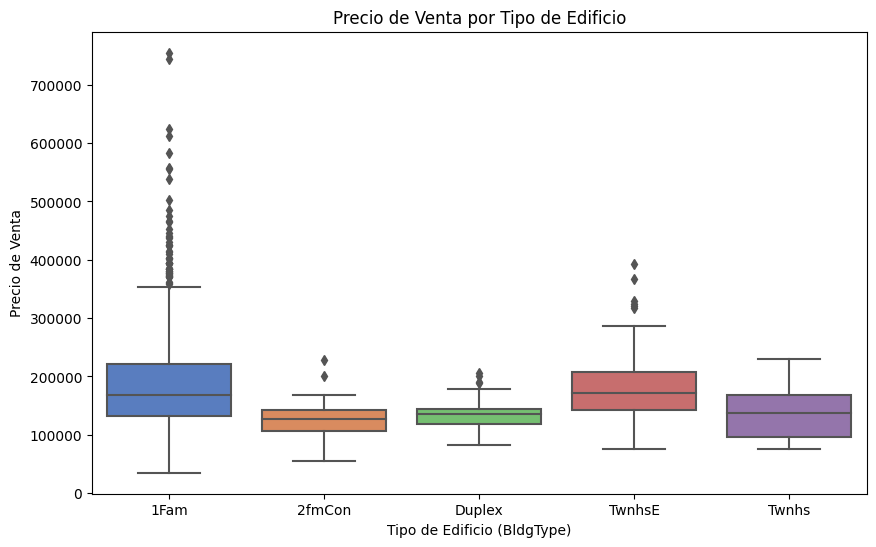

In [ ]:
# Boxplot de precios de venta por tipo de edificio
plt.figure(figsize=(10, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=raw_data, palette='muted')
plt.xlabel('Tipo de Edificio (BldgType)')
plt.ylabel('Precio de Venta')
plt.title('Precio de Venta por Tipo de Edificio')

Text(0.5, 1.0, 'Precio de Venta por Tipo de Zonificación')

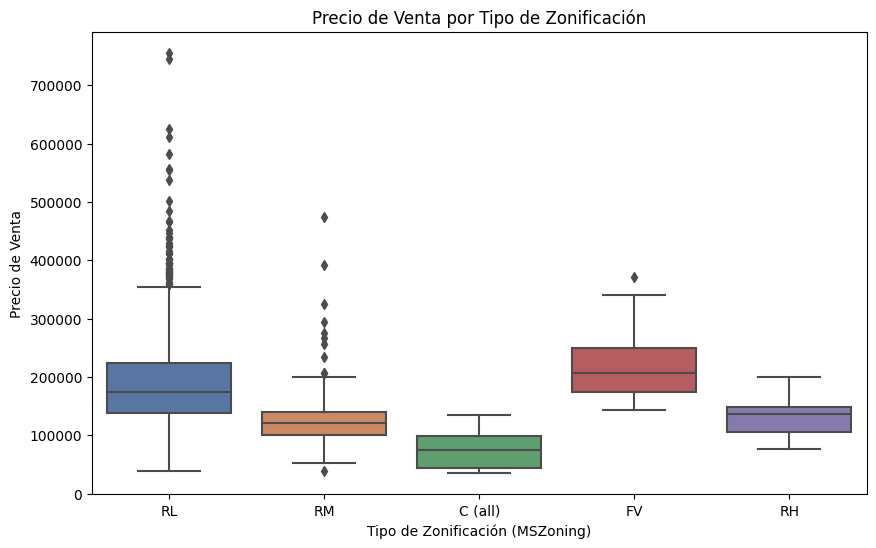

In [ ]:
# Boxplot de precios de venta por tipo de zonificación
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=raw_data, palette='deep')
plt.xlabel('Tipo de Zonificación (MSZoning)')
plt.ylabel('Precio de Venta')
plt.title('Precio de Venta por Tipo de Zonificación')

Text(0.5, 1.0, 'Diagrama de Dispersión de Overall Quality vs. Precio de Venta')

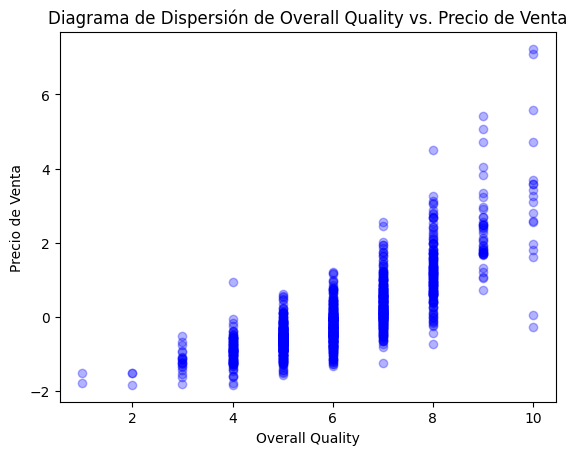

In [ ]:
# Scatter plot de OverallQual vs. SalePrice
plt.scatter(raw_data['OverallQual'], df_scaler['SalePrice'], alpha=0.3, color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Precio de Venta')
plt.title('Diagrama de Dispersión de Overall Quality vs. Precio de Venta')